In [2]:
%matplotlib inline
import fair

import numpy as np

from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['font.size'] = (16)

from fair.forward import fair_scm

In [8]:
# Get RCP modules
from fair.RCPs import rcp45

# do a normal RCP4.5 run for comparison
C45, F45, T45 = fair_scm(
    emissions  = rcp45.Emissions.emissions,
    F_solar    = 0.,
    F_volcanic = 0.
)

# CHANGE NUMBER OF YEARS OF ZERO EMISSIONS HERE
emissions_new = np.copy(rcp45.Emissions.emissions)
emissions_new[np.where((rcp45.Emissions.emissions[:,0]>=2020) & 
                       (rcp45.Emissions.emissions[:,0]<2051)),1]=0

C_gap, F_gap, T_gap = fair_scm(
    emissions  = emissions_new,
    F_solar    = 0.,
    F_volcanic = 0.
)

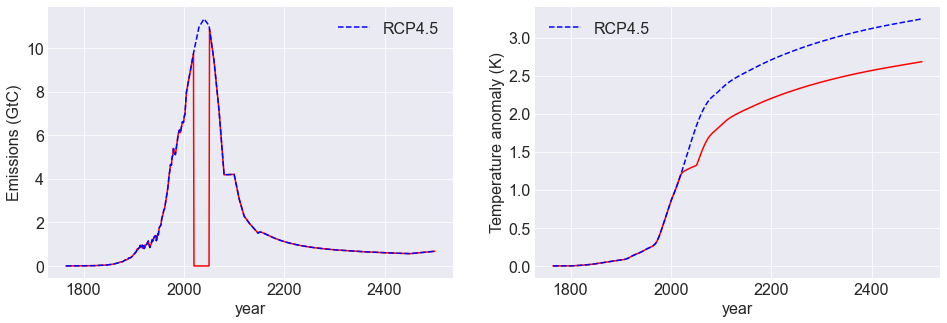

In [9]:
plt.rcParams['figure.figsize'] = (16, 5)
fig = plt.figure()
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

ax0.plot(rcp45.Emissions.year, emissions_new[:,1],'r')
ax1.plot(rcp45.Emissions.year, T_gap,'r')

ax0.plot(rcp45.Emissions.year, rcp45.Emissions.emissions[:,1], 'b--', label='RCP4.5')
ax1.plot(rcp45.Emissions.year, T45, 'b--', label='RCP4.5')

ax0.set_ylabel('Emissions (GtC)')
ax1.set_ylabel('Temperature anomaly (K)')

ax0.set_xlabel('year')
ax1.set_xlabel('year')
ax0.legend()
ax1.legend()
plt.savefig('Fair30.png')